In [2]:
import json 
import os
import tweepy

import plotly.express as px
import pandas as pd
from dotenv import load_dotenv

In [3]:
load_dotenv()

TWITTER_API_KEY = os.getenv("TWITTER_API_KEY")
TWITTER_API_SECRET = os.getenv("TWITTER_API_SECRET")
TWITTER_ACCESS_TOKEN = os.getenv("TWITTER_ACCESS_TOKEN")
TWITTER_ACCESS_TOKEN_SECRET = os.getenv("TWITTER_ACCESS_TOKEN_SECRET")

auth = tweepy.OAuthHandler(TWITTER_API_KEY, TWITTER_API_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
chrisalbon_followers = api.followers_ids('chrisalbon')

In [6]:
class data_wrangling:
    
    # Definining api as a class variable (shared among all instance of the class) 
    api = tweepy.API(auth, wait_on_rate_limit=True)    
    
    def __init__(self, user_id, follower_count=10):
        # instance variables (unique for each instance of the class)
        self.user_id = user_id
        self.follower_count = follower_count

    # The first 10 ids of the user's followers
    def followers_ids(self):
        followers_ids = api.followers_ids(self.user_id)
        return followers_ids

    def get_follower_data(self, followers_ids):

        times = []
        text = []

        # Loop through the follower_count (int) defined in instance
        for followers in followers_ids[:self.follower_count]:

            # Try and excepts statement to bipass an error that arises when we call a protected user's information
            try:

                favorited_tweets = api.favorites(id=f'{followers}')


                # Fir each tweet that the follower liked, lets add it to the l string    
                for tweet in range(len(favorited_tweets)):

                    status = favorited_tweets[tweet]

                    #convert to string
                    json_str = json.dumps(status._json)

                    #deserialise string into python object
                    parsed = json.loads(json_str)
                    # gets the created_at (time) and the text from the tweets the followers liked
                    times.append(parsed.get('created_at'))
                    text.append(parsed.get('text'))

            except tweepy.TweepError:

                pass

        # seperates hours, mins, secs into lists to be put into a df
        hours, mins, secs = [int(i[11:13]) for i in times], [int(i[14:16]) for i in times], [int(i[17:19]) for i in times]
        
        # creates df with times and text
        x = pd.DataFrame(data={'hours':hours, 'mins':mins, 'secs':secs, 'text':text})
        
        return x

In [10]:
dw = data_wrangling('chrisalbon', 10)
fi = dw.followers_ids()
get_follower_data = dw.get_follower_data(fi)

In [11]:
get_follower_data

,hours,mins,secs,text
0,10,0,0,ITV Daytime has taken the decision to stop bro...
1,12,51,42,One thing I'll take form #Coronacrisis is the ...
2,6,56,4,xkcd this morning is particularly magnificent....
3,6,2,44,COVID-19: re-learning in 2020 what we already ...
4,14,59,22,Something I explained to Jessica today: It's p...
...,...,...,...,...
64,22,41,57,Exponentially increasing interest for cannabis...
65,18,43,7,This report might be useful business intellige...
66,11,15,32,The single most important predictor for recidi...
67,2,18,52,"This speech was two years ago. \n\nHis whole ""..."


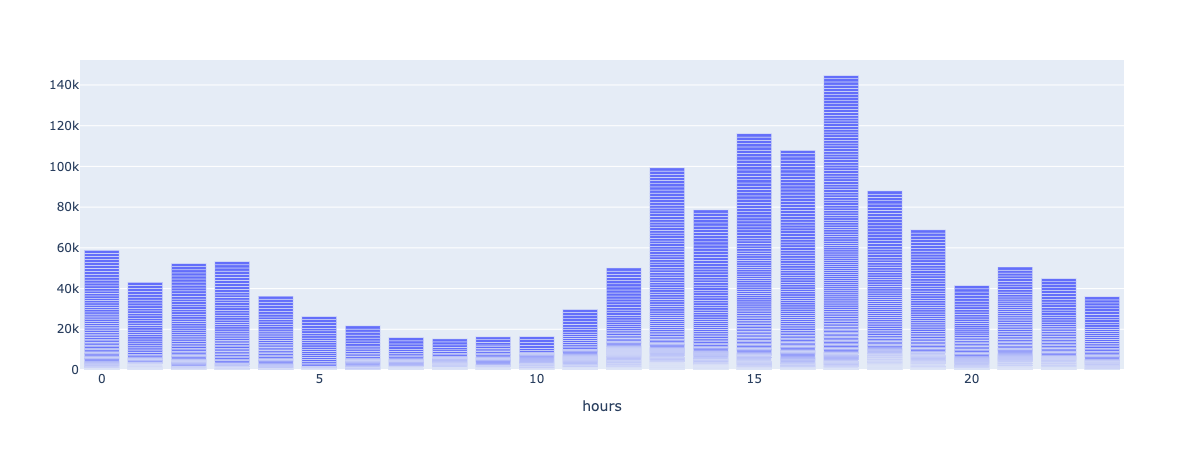

In [19]:
fig = px.bar(get_follower_data, x='hours')
fig.show()